In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [43]:
food = pd.read_csv('Data/testing.csv')
food = food.loc[food['Category'] == 'Food & Drinks']
food.replace(',', '',regex=True, inplace=True)

# Data Preprocessing

In [44]:
food.head()

,Date,Category,Sub-category,Amount
0,2023-01-01,Food & Drinks,Drinks,-200.00
1,2023-01-01,Food & Drinks,Take-out,-40.45
2,2023-01-02,Food & Drinks,Coffee,-5.74
3,2023-01-03,Food & Drinks,NOCHARGE,0.00
4,2023-01-04,Food & Drinks,NOCHARGE,0.00


In [45]:
cols = ['Category', 'Sub-category']
food.drop(cols, axis=1, inplace=True)
food = food.sort_values('Date')
food = food.astype({'Amount': float})

In [46]:
food.head()

,Date,Amount
0,2023-01-01,-200.00
1,2023-01-01,-40.45
2,2023-01-02,-5.74
3,2023-01-03,0.00
4,2023-01-04,0.00


In [47]:
food = food.groupby('Date')['Amount'].sum().reset_index()

In [48]:
food.head()

,Date,Amount
0,2023-01-01,-240.45
1,2023-01-02,-5.74
2,2023-01-03,0.00
3,2023-01-04,0.00
4,2023-01-05,0.00


# Indexing with Time Series Data

In [49]:
food['Date'] = pd.to_datetime(food['Date'])
food = food.set_index('Date')
food.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

# Visualizing Food & Drink Spending Time Series Data

<function matplotlib.pyplot.show(close=None, block=None)>

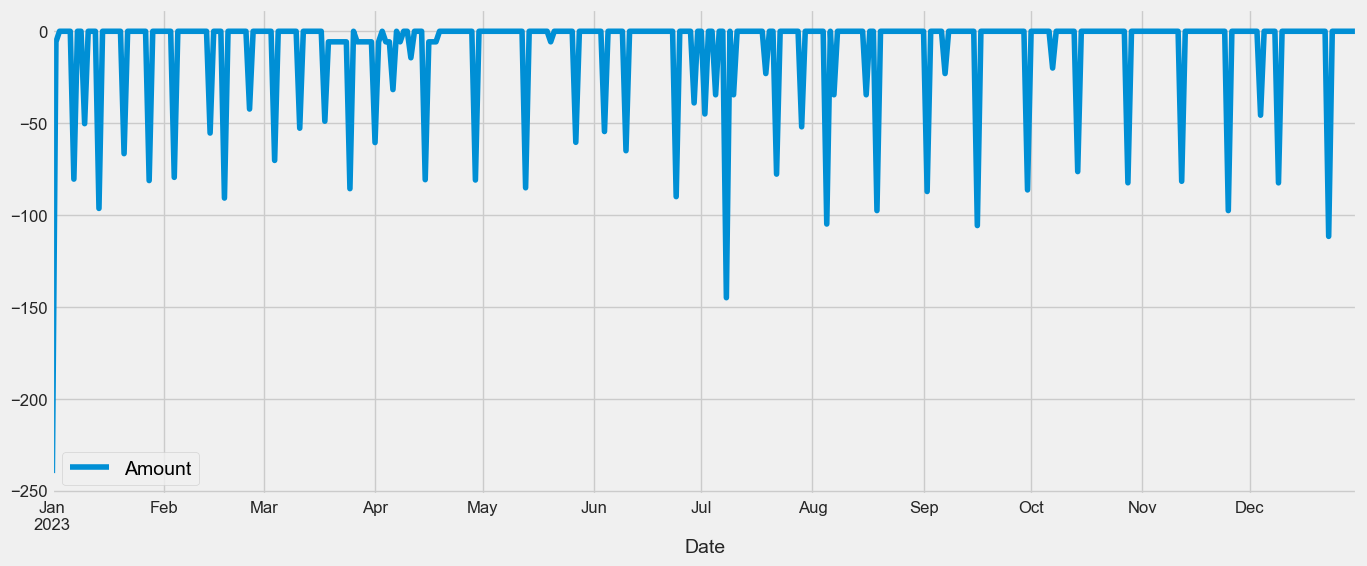

In [50]:
food.plot(figsize=(15,6))
plt.show

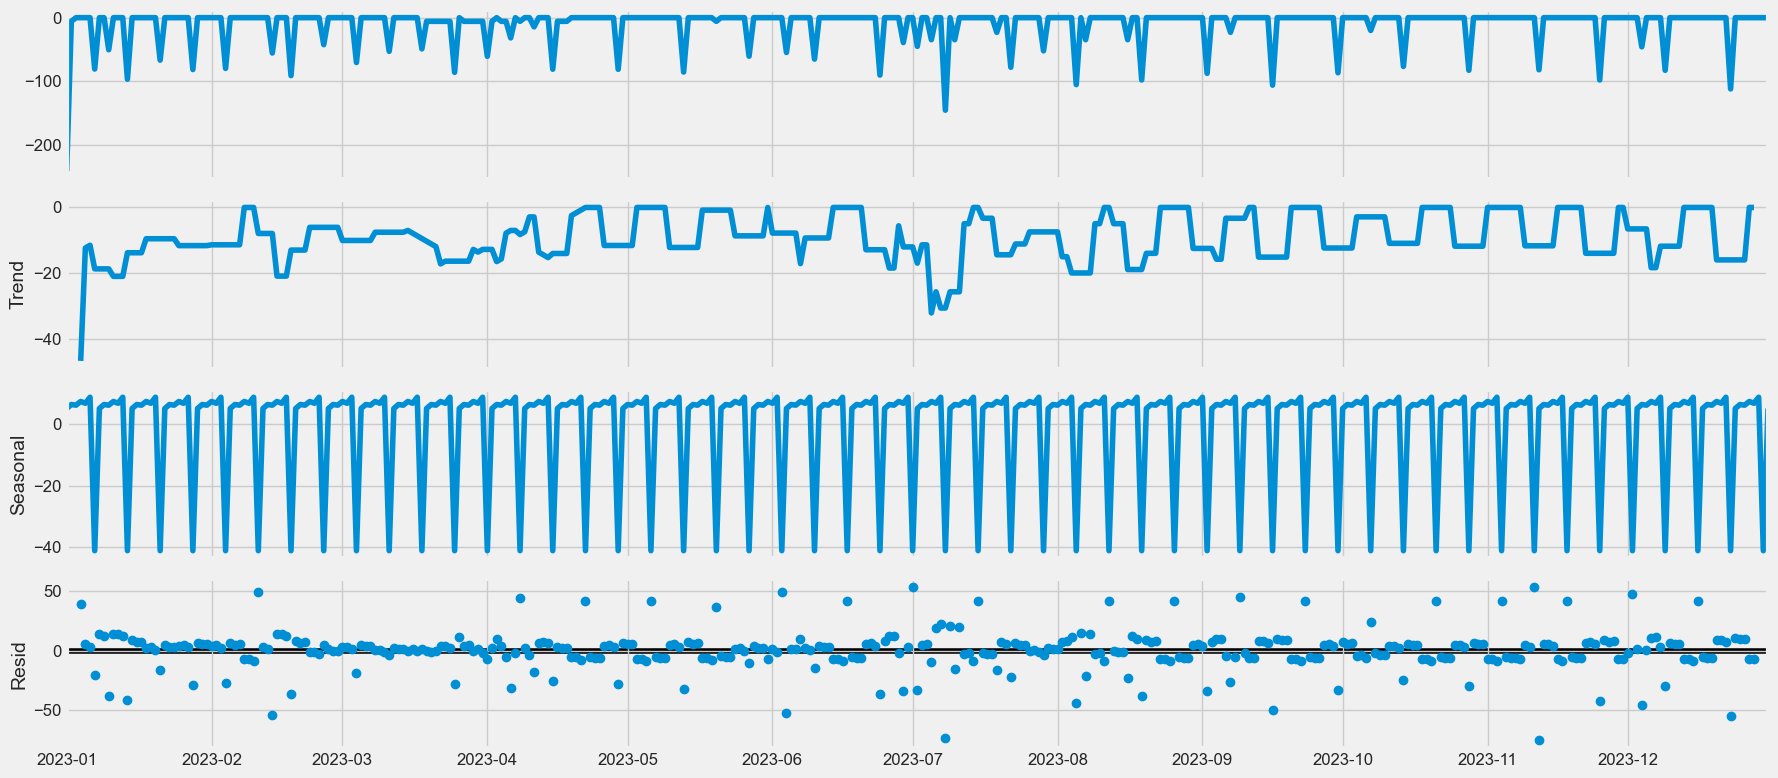

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(food, model='additive')
fig = decomposition.plot()
plt.show()

# Time Series Forcasting with ARIMA

In [53]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [54]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(food, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3409.0518616127915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3296.730650954829
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3519.8023886221927
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3168.5277721451002
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3305.161365809737
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3298.519451039966
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3323.250030415914


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3169.99586849995
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3402.608013527721
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3276.3775103220514
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3501.7249987664313


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3157.736850354601
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3307.159987500812
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3278.3616359703037


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3324.7741563634677


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3158.2632402716
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3648.58034524341
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3521.6319920051565
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:3770.1114767001823


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3421.2636381640987
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:3536.3350774729256
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3523.3805686707083
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3554.34688429952


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:3420.3460261381624
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:3354.01704959975


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3234.4360221051306


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:3507.8503613827497


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No f

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3157.6057997251046
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:3259.436492051113


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3236.3998596665456


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:3322.5222594369648


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:3159.593790257639
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:3410.979012166992
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:3298.719418239808
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:3518.4039503403233


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:3170.1488277911476
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:3298.651805922964


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:3285.498397548635
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:3303.4902664689307


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:3171.505302569315
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:3363.446123916847


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3251.6038990967418


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:3462.656416447664


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3145.053374165646


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:3260.006126816928


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No f

ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3253.5889042809185
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3278.892285295318


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3146.1247304865506
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:3551.5482445612333
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3376.2771949013613
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3723.9571345666714


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:3345.254383882547
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:3386.9404707488557


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:3377.4197014233605


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3464.6030723719523


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:3313.4808154458015
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3350.593614693096


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3231.601741860673


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:3508.5745412727088


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3158.6440753127135


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:3241.4237526362576


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3232.3967206471443


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:3313.2904271179145


C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3160.634698222665


# Fitting the ARIMA model

In [55]:
mod = sm.tsa.statespace.SARIMAX(food, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0283      0.118     -0.240      0.810      -0.260       0.203
ma.L1         -1.0000     27.012     -0.037      0.970     -53.942      51.942
ar.S.L12      -0.4519      0.035    -12.835      0.000      -0.521      -0.383
sigma2       989.3285   2.67e+04      0.037      0.970   -5.14e+04    5.34e+04


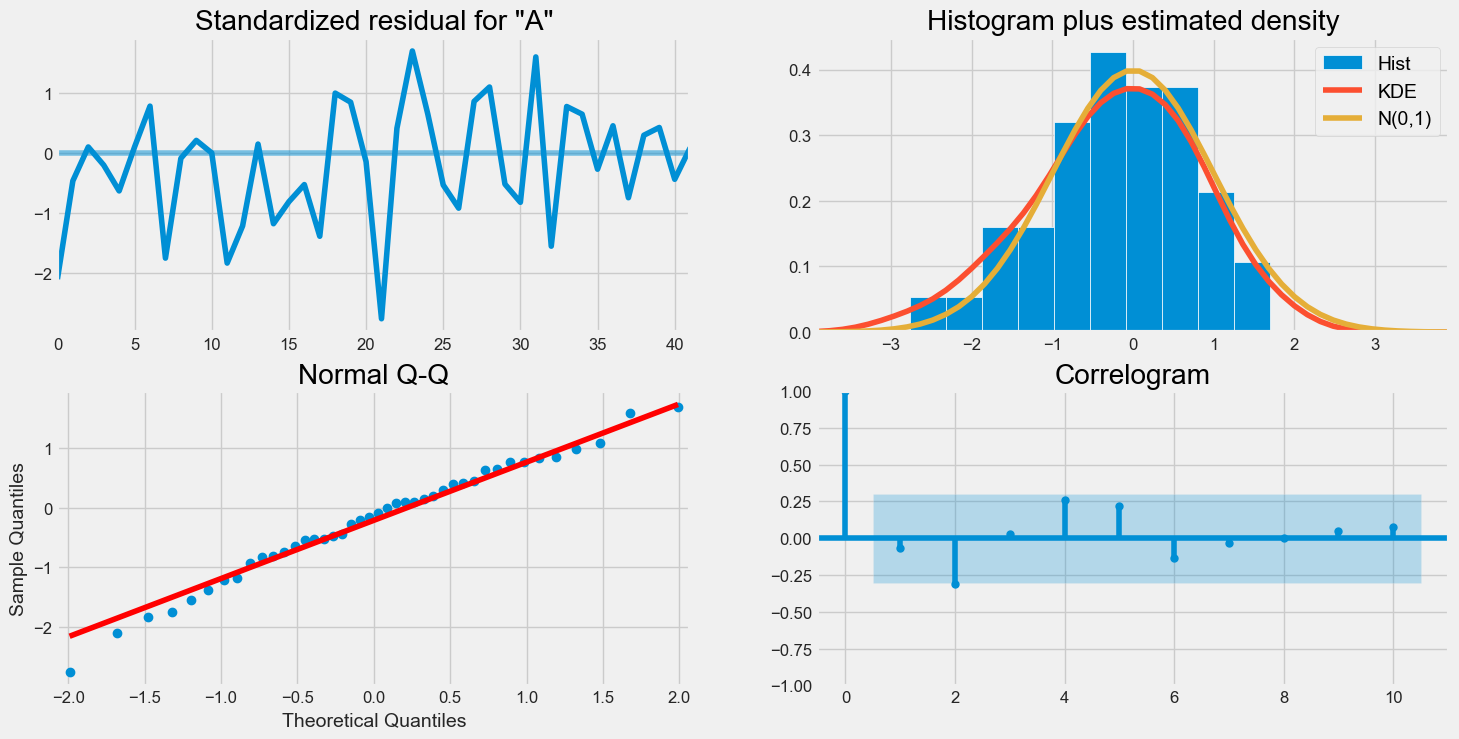

In [29]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating Forecasts

In [30]:
pred_oct = results.get_prediction(start=pd.to_datetime('2023-10-01'), dynamic=False)
pred_oct_ci = pred_oct.conf_int()
ax = food['2023':].plot(label='observed')
pred_oct.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_oct_ci.index,
               pred_oct_ci.iloc[:, 0],
               pred_oct_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Food Spending')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [31]:
pred_nov = results.get_prediction(start=pd.to_datetime('2023-11-01'), dynamic=False)
pred_nov_ci = pred_nov.conf_int()
ax = food['2023':].plot(label='observed')
pred_nov.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_nov_ci.index,
                pred_nov_ci.iloc[:, 0],
                pred_nov_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Food Spending')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [32]:
pred_dec = results.get_prediction(start=pd.to_datetime('2023-12-01'), dynamic=False)
pred_dec_ci = pred_dec.conf_int()
ax = food['2023':].plot(label='observed')
pred_dec.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_dec_ci.index,
                pred_dec_ci.iloc[:, 0],
                pred_dec_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Food Spending')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [33]:
food['2023-10-01':]

,Amount
Date,
2023-10-07,-20.00
2023-10-14,-76.37
2023-10-28,-82.46
2023-11-12,-81.64
2023-11-25,-97.59
2023-12-04,-45.67
2023-12-09,-82.49
2023-12-23,-111.63


In [34]:
oct_forecasted = pred_oct.predicted_mean
oct_truth = food['2023-10-01':]

NameError: name 'pred_oct' is not defined

In [35]:
oct_forecasted.info()

NameError: name 'oct_forecasted' is not defined

In [36]:
oct_forcasted = pd.DataFrame(oct_forecasted, columns=['predicted_mean'])
oct_forcasted.rename(columns={'predicted_mean':'Amount'}, inplace=True)
oct_mse = (np.square(forcasted['Amount'] - oct_truth['Amount'])).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(oct_mse, 2)))

NameError: name 'oct_forecasted' is not defined

In [37]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(oct_mse), 2)))

NameError: name 'oct_mse' is not defined

In [38]:
nov_forcasted = pd.DataFrame(nov_forecasted, columns=['predicted_mean'])
nov_forcasted.rename(columns={'predicted_mean':'Amount'}, inplace=True)
nov_mse = (np.square(forcasted['Amount'] - nov_truth['Amount'])).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(nov_mse, 2)))

NameError: name 'nov_forecasted' is not defined

In [39]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(nov_mse), 2)))

NameError: name 'nov_mse' is not defined

In [40]:
dec_forcasted = pd.DataFrame(dec_forecasted, columns=['predicted_mean'])
dec_forcasted.rename(columns={'predicted_mean':'Amount'}, inplace=True)
dec_mse = (np.square(forcasted['Amount'] - nov_truth['Amount'])).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(dec_mse, 2)))

NameError: name 'dec_forecasted' is not defined

In [41]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(dec_mse), 2)))

NameError: name 'dec_mse' is not defined

# Producing and Visualizing Forecasts

C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


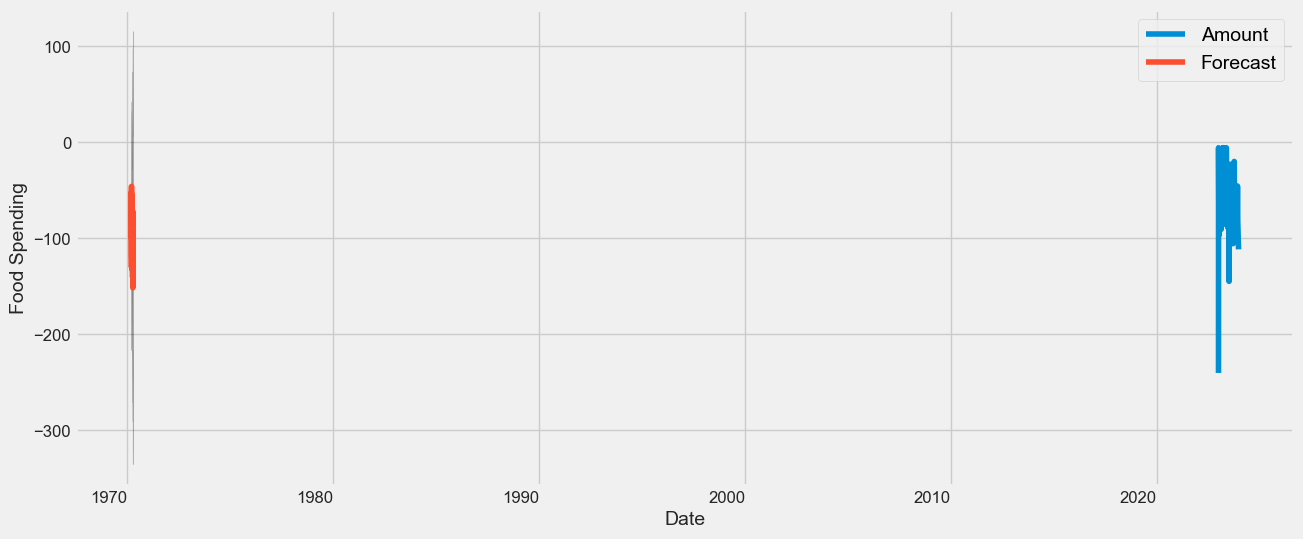

In [42]:
pred_uc = results.get_forecast(steps=32)
pred_ci = pred_uc.conf_int()
ax = food.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Food Spending')
plt.legend()
plt.show()